# Assignment 01

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Data import Data
from LinearModel import LinearModel

Create 20 data points with a 10/10 train/test split.
<br>
X values are uniform in the interval [0,1]
<br>
See [Data.py](Data.py) for Y values and noise generation.

In [3]:
data = Data(20)

Generate and train 10 models, 1 for each degree from [0,9]
<br>
Model weights are calculated using scikit-learn. See [LinearModel.py](LinearModel.py)

In [4]:
models = [LinearModel(x) for x in range(10)]
for model in models:
    model.train(data)

Print the weights for models with degrees ${0, 1, 3, 9}$

In [5]:
orders = [0, 1, 3, 9]
weights = pd.DataFrame()
for order in orders:
    temp = pd.DataFrame({f'M={order}': models[order].weights})
    weights = pd.concat([weights, temp], axis=1)
weights.round(2).fillna('')

M=0   M=1    M=3        M=9
0  0.01  0.93  -0.13       9.37
1       -1.74  12.02    -347.99
2             -35.54    4774.40
3              23.81  -32340.98
4                     125692.89
5                    -298730.51
6                     440971.28
7                    -394152.31
8                     195225.78
9                     -41101.90

Plot models with degrees ${0, 1, 3, 9}$

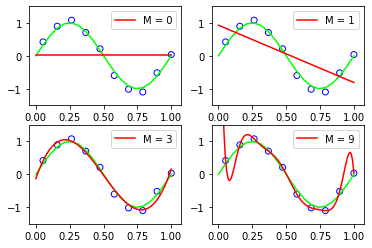

In [6]:
fig, ax = plt.subplots(2, 2)
for i, order in enumerate(orders):
    models[order].plot(ax[i // 2][ i % 2], data)
plt.show()

Notice the plot for $M = 9$ being overfit.

Plot the RMS error for each model

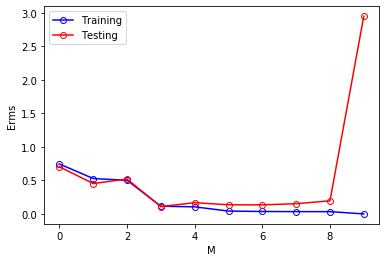

In [7]:
train_errors = []
test_errors = []
degrees = list(range(len(models)))
for model in models:
    train_errors.append(model.error(data.X_train, data.Y_train))
    test_errors.append(model.error(data.X_test, data.Y_test))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(degrees, train_errors, color='blue', marker='o', markerfacecolor='none', label='Training')
ax.plot(degrees, test_errors, color='red', marker='o', markerfacecolor='none', label='Testing')
ax.set_ylabel('Erms')
ax.set_xlabel('M')
ax.legend(loc='upper left')
plt.show()

Generate 200 new data points and fit 9th degree model using 100 train data points.

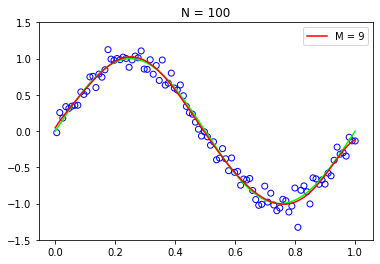

In [8]:
data_big = Data(200)
model9 = LinearModel(9)
model9.train(data_big)
fig, ax = plt.subplots()
model9.plot(ax, data_big)
plt.title('N = 100')
plt.show()

Notice that this model does not seem overfit.

Train 6 new models using regularization with $λ \in {1, 1/10, 1/100, 1/1000, 1/10000, 1/100000}$

In [9]:
hyper_parameters = list(10 ** -x for x in range(6))
models = [LinearModel(9, hp) for hp in hyper_parameters]
for model in models:
    model.train(data)

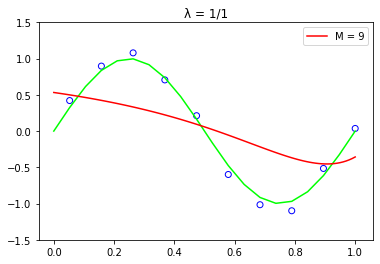

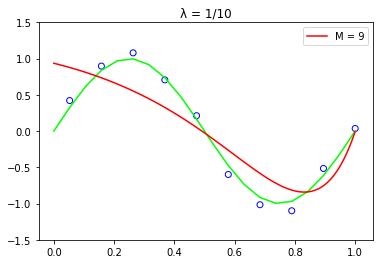

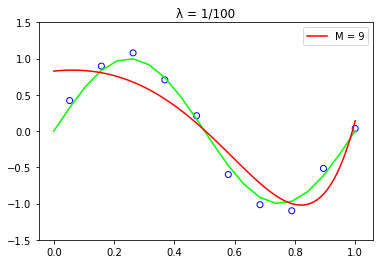

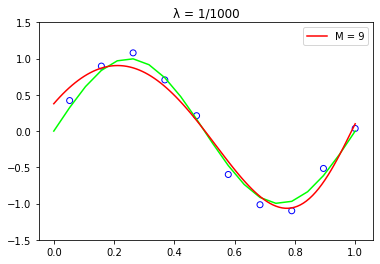

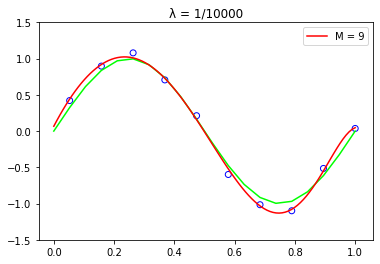

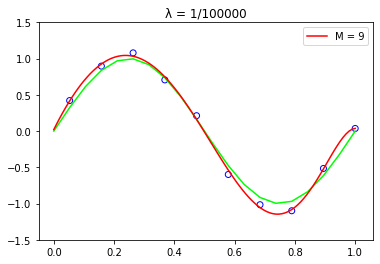

In [10]:
for i, hp in enumerate(hyper_parameters):
    fig, ax = plt.subplots()
    models[i].plot(ax, data)
    plt.title(f'λ = 1/{1/hp:.0f}')
    plt.show()

Train some new models using hyper parameters such that $ln(λ) \in [-30, -5]$

In [11]:
hyper_parameters = np.arange(-30,-4)
models = [LinearModel(9, np.exp(hp)) for hp in hyper_parameters]
for model in models:
    model.train(data)

Plot train and test error for these new models.

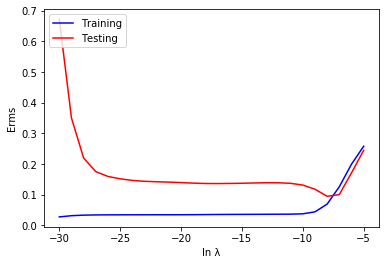

In [12]:
train_errors = []
test_errors = []
for model in models:
    train_errors.append(model.error(data.X_train, data.Y_train))
    test_errors.append(model.error(data.X_test, data.Y_test))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(hyper_parameters, train_errors, color='blue', label='Training')
ax.plot(hyper_parameters, test_errors, color='red', label='Testing')
ax.set_ylabel('Erms')
ax.set_xlabel('ln λ')
ax.legend(loc='upper left')
plt.show()

Find the model with lowest test error.

In [13]:
min_index = np.argmin(test_errors)
best_model = models[min_index]
with np.printoptions(precision=3, suppress=True):
    print(f'Based on the test performance, the best model with degree 9 is ln λ = {np.log(best_model.hyper_parameter)}')
    print(f'Weights: {best_model.weights}')

Based on the test performance, the best model with degree 9 is ln λ = -8.0
Weights: [  0.178   6.837 -13.41   -6.213   2.849   7.273   7.17    3.92   -1.214
  -7.324]


Plot the best model found above.

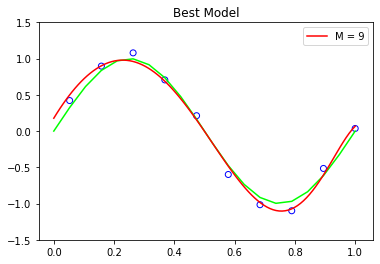

In [14]:
fig, ax = plt.subplots()
best_model.plot(ax, data)
plt.title('Best Model')
plt.show()